In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
pclass = ctrl.Antecedent(np.arange(0, 4, 1), 'pclass')
fare = ctrl.Antecedent(np.arange(0, 513, 1), 'fare')
age = ctrl.Antecedent(np.arange(0, 81, 1), 'age')
sex = ctrl.Antecedent(np.arange(0, 3, 1), 'sex')
survived = ctrl.Consequent(np.arange(0,3,1), 'survived')

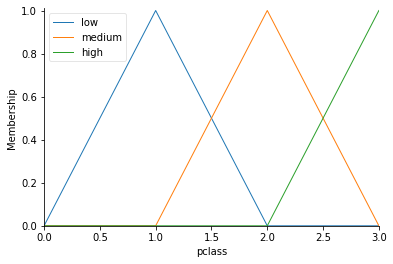

In [ ]:
pclass['low'] = fuzz.trapmf(pclass.universe,[1,1,1,1])
pclass['medium'] = fuzz.trimf(pclass.universe,[2,2,2])
pclass['high'] = fuzz.trapmf(pclass.universe,[3,3,3,3])
pclass.view()

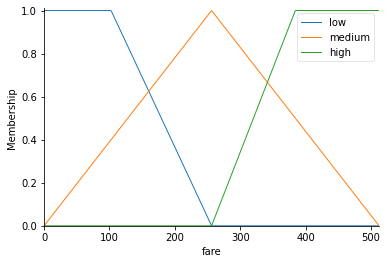

In [ ]:
fare['low'] = fuzz.trapmf(fare.universe,[0,0,102.46584,256.1646])
fare['medium'] = fuzz.trimf(fare.universe,[0,256.1646,512.3292])
fare['high'] = fuzz.trapmf(fare.universe,[256.16,384.2446,512.3292,513])
fare.view()

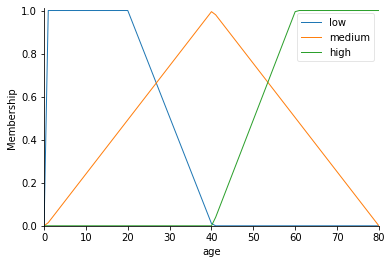

In [ ]:
age['low'] = fuzz.trapmf(age.universe,[0.42,0.42,20,40.21])
age['medium'] = fuzz.trimf(age.universe,[0.42,40.21,80])
age['high'] = fuzz.trapmf(age.universe,[40.21,60.105,80,81])
age.view()

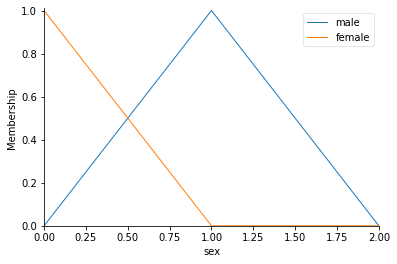

In [ ]:
sex['male'] = fuzz.trimf(survived.universe,[1,1,1])
sex['female'] = fuzz.trimf(survived.universe,[0,0,0])
sex.view()

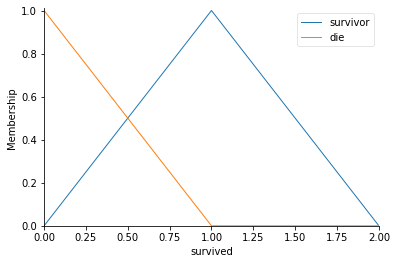

In [ ]:
survived['survivor'] = fuzz.trimf(survived.universe,[1,1,1])
survived['die'] = fuzz.trimf(survived.universe,[0,0,0])
survived.view()

In [ ]:
rule1 = ctrl.Rule(pclass['low'] & fare['high'] & age['medium'], survived['survivor'])
rule2 = ctrl.Rule(pclass['low'] & fare['medium'] & age['medium'], survived['survivor'])
rule3 = ctrl.Rule(pclass['low'] & fare['low'] & age['medium'], survived['survivor'])
rule4 = ctrl.Rule(pclass['low'] & fare['medium'] & age['low'], survived['survivor'])
rule5 = ctrl.Rule(pclass['low'] & fare['high'] & age['high'], survived['survivor'])
rule6 = ctrl.Rule(pclass['low'] & fare['low'] & age['high'], survived['die'])
rule7 = ctrl.Rule(pclass['medium'] & fare['high'] & age['medium'], survived['survivor'])
rule8 = ctrl.Rule(pclass['medium'] & fare['medium'] & age['medium'], survived['die'])
rule9 = ctrl.Rule(pclass['medium'] & fare['high'] & age['low'], survived['die'])
rule10 = ctrl.Rule(pclass['medium'] & fare['medium'] & age['low'], survived['survivor'])
rule11 = ctrl.Rule(pclass['medium'] & fare['low'] & age['low'], survived['die'])
rule12 = ctrl.Rule(pclass['medium'] & fare['medium'] & age['high'], survived['die'])
rule13 = ctrl.Rule(pclass['medium'] & fare['low'] & age['high'], survived['die'])
rule14 = ctrl.Rule(pclass['high'] & fare['high'] & age['medium'], survived['survivor'])
rule15 = ctrl.Rule(pclass['high'] & fare['low'] & age['medium'], survived['die'])
rule16 = ctrl.Rule(pclass['high'] & fare['medium'] & age['low'], survived['survivor'])
rule17 = ctrl.Rule(pclass['high'] & fare['low'] & age['low'], survived['die'])
rule18 = ctrl.Rule(pclass['high'] & fare['high'] & age['high'], survived['die'])
rule19 = ctrl.Rule(pclass['high'] & fare['medium'] & age['high'], survived['die'])
rule20 = ctrl.Rule(pclass['high'] & fare['low'] & age['high'], survived['die'])
rule21 = ctrl.Rule(pclass['low'] | fare['high'] | age['medium'], survived['survivor'])
rule22 = ctrl.Rule(pclass['medium'] | fare['medium'] | age['low'], survived['die'])
rule23 = ctrl.Rule(pclass['high'] | fare['low'] | age['high'], survived['die'])
rule24 = ctrl.Rule(pclass['low'] & fare['high'] & age['low'], survived['survivor'])
rule25 = ctrl.Rule(pclass['low'] & fare['low'] & age['low'], survived['survivor'])
rule26= ctrl.Rule(pclass['low'] & fare['medium'] & age['high'], survived['survivor'])
rule27 = ctrl.Rule(pclass['medium'] & fare['low'] & age['medium'], survived['die'])
rule28 = ctrl.Rule(pclass['medium'] & fare['high'] & age['high'], survived['die'])
rule29 = ctrl.Rule(pclass['high'] & fare['medium'] & age['medium'], survived['survivor'])
rule30 = ctrl.Rule(pclass['high'] & fare['high'] & age['low'], survived['die'])
rule31 = ctrl.Rule(pclass['high'] | fare['low'] | age ['medium'] & sex['male'], survived['die'])
rule32 = ctrl.Rule(pclass['low'] | fare['low'] & sex['female']|age ['medium'], survived['survivor'])
rule33 = ctrl.Rule(pclass['high'] | fare['low'] & sex['female']|age ['medium'], survived['survivor'])
rule34 = ctrl.Rule(pclass['low'] | fare['low'] & sex['female']|age ['medium'], survived['survivor'])
rule35 = ctrl.Rule(pclass['high'] | fare['low'] & sex['male']|age ['medium'], survived['survivor'])
rule36 = ctrl.Rule(pclass['high'] | fare['low'] & sex['male']|age ['medium'], survived['survivor'])
rule37 = ctrl.Rule(pclass['low'] | fare['low'] & sex['male']|age ['medium'], survived['survivor'])
rule38 = ctrl.Rule(pclass['high'] | fare['low'] & sex['male']|age ['low'], survived['survivor'])
rule39 = ctrl.Rule(pclass['high'] | fare['low'] & sex['female']|age ['medium'], survived['survivor'])
rule40 = ctrl.Rule(pclass['medium'] | fare['low'] & sex['female']|age ['low'], survived['survivor'])

In [ ]:
survival_ctrl = ctrl.ControlSystem([rule1, rule2, rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11, rule12, rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21, rule22, rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30])

In [ ]:
survival = ctrl.ControlSystemSimulation(survival_ctrl)

In [ ]:
survival.input['pclass'] = 1
survival.input['fare'] = 512
survival.input['age'] = 26

survival.compute()

NameError: ignored

In [ ]:
print (survival.output['survived'])

0.7884611047206621


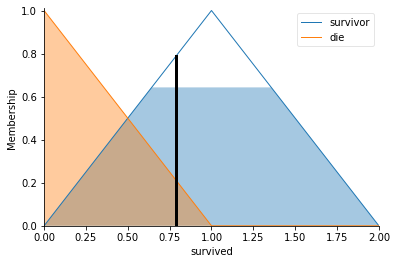

In [ ]:
survived.view(sim=survival)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
titanic_data = pd.read_csv("gdrive/MyDrive/train.csv")

NameError: ignored

In [ ]:
titanic_data.describe()